## IMPORT DAS BIBLIOTECAS

In [41]:
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## DEFINIÇÃO DOS DATA_SET

In [42]:

df_train = pd.read_csv('train.csv', sep="," , encoding="UTF8" )
df_test = pd.read_csv('test.csv', sep="," , encoding="UTF8" )

In [43]:
features = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5']

## OLHANDO A  CORRELAÇÃO DAS FEATURES DE NOTAS

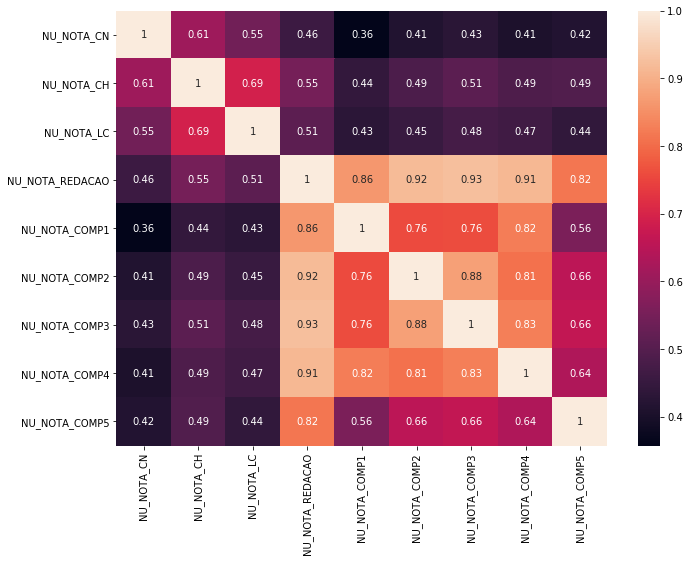

In [44]:
corr = df_train[features].corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10})

# DROP VALORES NULL

In [45]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)


In [64]:
y_train = df_train['NU_NOTA_MT']
x_train = df_train[features]
x_test = df_test[features]
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)
import sklearn.metrics as metrics
#print('MAE:', metrics.mean_absolute_error(x_train, x_test).round(8)  )
print(x_train)

[[-0.80263421  0.71954985  0.71493105 -0.58048134 -0.24537039 -0.65997811
  -0.5333386  -0.56687785 -0.55147084]
 [ 0.62520291 -0.39804679 -0.34238742  0.31012017  0.35861826  0.48160565
   0.60445041  0.58487397 -0.55147084]
 [ 0.54972253  0.2818245  -0.79004944 -0.19879498  0.35861826 -0.08918623
   0.03555591  0.58487397 -1.57448922]
 [-0.1526643   0.43549404 -0.3719993   0.18289138  0.35861826  0.48160565
   0.03555591 -0.56687785  0.47154753]
 [-0.68731697 -0.56879072 -1.0495889  -0.9621677   0.35861826 -1.80156188
  -1.67112762 -0.56687785 -0.55147084]
 [-0.63909339  0.26319789  1.05459679  0.69180653  0.35861826  0.48160565
   0.60445041  0.58487397  0.98305672]
 [-1.59727484 -1.3014374  -0.38941806  0.31012017  0.35861826  0.48160565
   0.03555591 -0.56687785  0.98305672]
 [-1.36664036  0.0257086   0.2411409   0.56457774  0.35861826  0.48160565
   0.60445041  0.58487397  0.47154753]
 [ 1.10743865 -1.23779648 -0.978172   -1.8527692  -2.05733631 -1.80156188
  -1.67112762 -1.71862

In [65]:
clf = linear_model.LinearRegression()
clf.fit(x_train, y_train)

Training:0.2679283343714066
Test:1.0


In [67]:
y_pred = clf.predict(x_test)
answer = pd.DataFrame(data={'NU_NOTA_MT': y_pred, 'NU_INSCRICAO': df_test['NU_INSCRICAO']})
answer.loc[(answer['NU_NOTA_MT'] < 200), 'NU_NOTA_MT'] = 0
answer.to_csv('answer.csv',index=False)